In [1]:
# Problem Statement
# Agriculture is an important industry in India. It is essential for the survival and growth of the Indian economy. India is a large producer of a variety of agricultural products. Soil is an important factor in crop cultivation. Soil is a non- renewable dynamic natural resource that is necessary for life. Previously, crop cultivation was done by farmers who had hands-on experience. Farmers face difficulties in choosing the best suitable crop based on soil characteristics and features.

# So, a recommendation system has been developed that employs machine learning algorithms to recommend the crop that can be harvested in a particular soil



In [2]:
# Goals¶
# The goal is to determine which crop is suitable for certain soil conditions.

# Objective
# The objective is to analyze conditions of soils based on several variables, determine what variables affect soil conditions the most and contribute in recommendation of crops, then build a model that can recommend the crop.

In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../datasets/crop_recommendation.csv')

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.size

17600

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
df['label'].value_counts()

pigeonpeas     100
lentil         100
grapes         100
jute           100
chickpea       100
apple          100
watermelon     100
coffee         100
banana         100
coconut        100
rice           100
kidneybeans    100
cotton         100
mango          100
orange         100
maize          100
blackgram      100
mothbeans      100
muskmelon      100
mungbean       100
papaya         100
pomegranate    100
Name: label, dtype: int64

<AxesSubplot:>

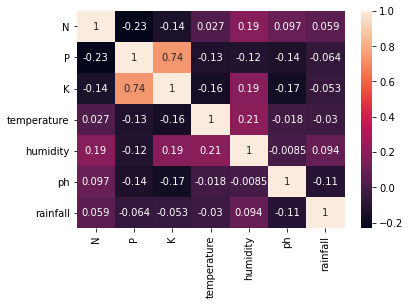

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
# seprate X and y ie. features and labels
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1760, 7)
(440, 7)
(1760,)
(440,)


In [15]:
# store the model and predictions
models_names = []
accurence = []

In [16]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
models_names.append('Decision Tree')
accurence.append(metrics.accuracy_score(y_test, y_pred))

In [17]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
models_names.append('Random Forest')
accurence.append(metrics.accuracy_score(y_test, y_pred))


In [18]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
models_names.append('KNN')
accurence.append(metrics.accuracy_score(y_test, y_pred))


In [19]:
# svm 
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
models_names.append('SVM')
accurence.append(metrics.accuracy_score(y_test, y_pred))


In [20]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
models_names.append('Naive Bayes')
accurence.append(metrics.accuracy_score(y_test, y_pred))


In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
models_names.append('Logistic Regression')
accurence.append(metrics.accuracy_score(y_test, y_pred))


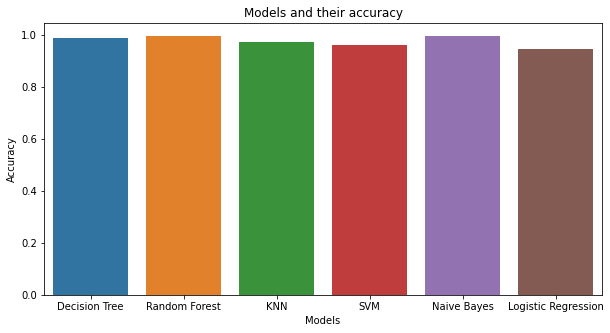

In [23]:
# plot the models and their accuracy
plt.figure(figsize=(10,5))
sns.barplot(x=models_names, y=accurence)
plt.title('Models and their accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [25]:
# from the above plot we can see that Random Forest has the highest accuracy
# so we will use Random Forest to predict the crop
# store the model in a pickle file
import pickle
pickle.dump(rf, open('crop_recommender.pkl', 'wb'))


In [3]:
# predict the crop
import pickle
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    model = pickle.load(open('crop_recommender.pkl', 'rb'))
    prediction = model.predict([[N, P, K, temperature, humidity, ph, rainfall]])
    return prediction[0]
    

In [7]:
result = predict_crop(20, 22, 43, 20.87974371, 82.00274423, 22.502985292, 202.9355362)
print("crop predicted by model-",result)

crop predicted by model- pomegranate


C:\Users\Suraj\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Thank You